In [461]:
from datetime import datetime
import pandas as pd
import gkeepapi
import sys
import pandas as pd
import json

date_day_map = {"0":"Mon","1":"Tue","2":"Wed","3":"Thu","4":"Fri","5":"Sat","6":"Sun"}

def _get_note_text(keep, id):
    gnote = keep.get(id)
    return gnote.text

def _sync_keep(keep):
    keep.sync()
    return keep

def get_note_list(keep, id):
    note = _get_note_text(keep, id)
    note_list = note.split('\n')
    return note_list

def parse_item(item):
    try:
        item = ' '.join(item.split())
        if 'Missing data on' not in item:
            el1,el2 = item.split('-')
            el2,el3 = el2.split('on')
            el3, el4 = el3.split('=')
            date_,month_ = el3.strip().split(' ')
            if 'hrs' not in el4:
                hrs = 0
            else:
                hrs,el4 = el4.strip().split('hrs')
            hrs = int(hrs)
            if 'mins' not in el4:
                mins = 0
            else:
                mins = int(el4.strip().split('mins')[0].strip())
            sleeptime = el1.strip()
            wakeuptime = el2.strip()
            date_ = int(date_)
            data_dict = {"sleeptime":sleeptime,"wakeuptime":wakeuptime,
                         "date":str(date_),"month":month_,"hours":hrs,"minutes":mins,"status":"Present"} 

        else:
            date_,month_ = item.split('Missing data on')[1].strip().split()
            data_dict =  {"sleeptime":None,"wakeuptime":None,
                          "date":str(date_),"month":month_,"hours":None,"minutes":None,"status":"Missing"}
        return data_dict
    except Exception as e:
        print("Exception = {} on {}".format(e,item))
        return None

def parse_note_list(note_list):
    valid_months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    sleep_dict={"sleeptime":[],"wakeuptime":[],"date":[],"month":[],"hours":[],"minutes":[]}
    
    for i in note_list:
        try:
            parsed_item = parse_item(i)
            sleep_dict["sleeptime"].append(parsed_item['sleeptime'])
            sleep_dict["wakeuptime"].append(parsed_item['wakeuptime'])
            sleep_dict["date"].append(parsed_item['date'])
            sleep_dict["month"].append(parsed_item['month'].capitalize())
            sleep_dict["hours"].append(parsed_item['hours'])
            sleep_dict["minutes"].append(parsed_item['minutes'])
        except Exception as e:
            print("There's a problem with {}".format(i))
    sleep_df = pd.DataFrame(sleep_dict)
    return sleep_df

def add_more_info(row):
    row["sleep_mins"] = int(row["hours"]*60+row["minutes"])
    datetime_object = datetime.strptime(str(row["date"])+"-"+row["month"]+"-2020", '%d-%b-%Y')
    row["day"] = date_day_map[str(datetime_object.weekday())]
    return row


def _authenticate(keep):
    try:        
        with open("./_auth.json") as creds:
            credentials = json.load(creds)
            username = credentials["username"]
            password = credentials["password"]

        success = keep.login(username, password)
    except Exception as e:
        success = False
    finally:
        return success
    
def __init__():
    keep = gkeepapi.Keep()
    success = _authenticate(keep)
    return keep

def everything(id):
    starttime = datetime.now()
    if 'keep' not in dir():
        keep = __init__()
    else:
        keep = _sync_keep(keep)
    note_list = get_note_list(keep, id)
    sleep_df = parse_note_list(note_list)
    sleep_df = sleep_df.dropna()
    sleep_df = sleep_df.apply(add_more_info, axis=1)
    print("Time taken to return note = {}s".format(datetime.now()-starttime))
    return sleep_df

In [462]:
sleep_df = everything('1EjOt3vPyDVsMzkCAfFxdqVGpRrRXdCbHBIsttpBcxGWHzDpIu1UHCbsbuAm1mg')

Time taken to return note = 0:00:07.439790s


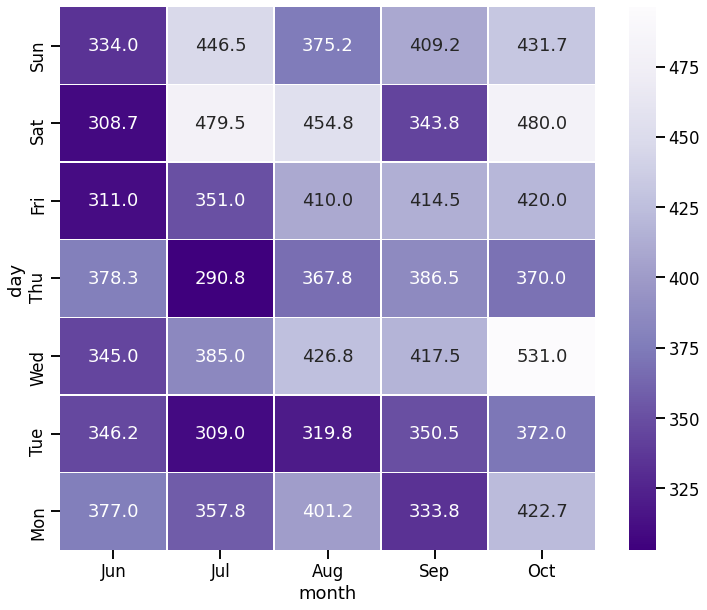

In [463]:
import seaborn as sns
df = pd.pivot_table(data=sleep_df, index='day',values='sleep_mins', columns='month')
df=df.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][::-1])
df = df[["Jun","Jul","Aug","Sep","Oct"]]
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df, annot=True, fmt="0.1f", linewidths=.5, cmap='Purples_r',ax=ax,robust=True)


In [457]:
# Older graphs

# sns.set_context("talk")
# graph_df = pd.pivot_table(sleep_df[['month', 'day', 'sleep_mins']], index=['day', 'month'], aggfunc='min')
# graph_df = graph_df.unstack(level=0)
# f, ax = plt.subplots(figsize=(11, 8))
# ax = sns.heatmap(graph_df, annot=True, fmt="0.1f", linewidths=.5, cmap='Purples_r',ax=ax,square=True,robust=True)


In [464]:
from datetime import datetime
import gkeepapi
import pandas as pd
import json

date_day_map = {"0": "Mon", "1": "Tue", "2": "Wed", "3": "Thu", "4": "Fri", "5": "Sat", "6": "Sun"}


def _get_note_text(keep, _id):
    gnote = keep.get(_id)
    return gnote.text


def _sync_keep(keep):
    keep.sync()
    return keep


def get_note_list(keep, _id):
    note = _get_note_text(keep, _id)
    note_list = note.split('\n')
    return note_list


def parse_item(item):
    try:
        item = ' '.join(item.split())
        if 'Missing data on' not in item:
            el1, el2 = item.split('-')
            el2, el3 = el2.split('on')
            el3, el4 = el3.split('=')
            date_, month_ = el3.strip().split(' ')
            if 'hrs' not in el4:
                hrs = 0
            else:
                hrs, el4 = el4.strip().split('hrs')
            hrs = int(hrs)
            if 'minutes' not in el4:
                minutes = 0
            else:
                minutes = int(el4.strip().split('minutes')[0].strip())
            sleep_time = el1.strip()
            wake_time = el2.strip()
            date_ = int(date_)
            data_dict = {"sleep_time": sleep_time, "wake_time": wake_time,
                         "date": str(date_), "month": month_, "hours": hrs, "minutes": minutes, "status": "Present"}

        else:
            date_, month_ = item.split('Missing data on')[1].strip().split()
            data_dict = {"sleep_time": None, "wake_time": None,
                         "date": str(date_), "month": month_, "hours": None, "minutes": None, "status": "Missing"}
        return data_dict
    except Exception as e:
        print("Exception = {} on {}".format(e, item))
        return None


def parse_note_list(note_list):
    sleep_dict = {"sleep_time": [], "wake_time": [], "date": [], "month": [], "hours": [], "minutes": []}

    for i in note_list:
        try:
            parsed_item = parse_item(i)
            sleep_dict["sleep_time"].append(parsed_item['sleep_time'])
            sleep_dict["wake_time"].append(parsed_item['wake_time'])
            sleep_dict["date"].append(parsed_item['date'])
            sleep_dict["month"].append(parsed_item['month'].capitalize())
            sleep_dict["hours"].append(parsed_item['hours'])
            sleep_dict["minutes"].append(parsed_item['minutes'])
        except ValueError as e:
            print("Exception in parsing note list {} - {}".format(i, e))
    sleep_df = pd.DataFrame(sleep_dict)
    return sleep_df


def add_more_info(row):
    row["sleep_duration"] = int(row["hours"] * 60 + row["minutes"])
    datetime_object = datetime.strptime(str(row["date"]) + "-" + row["month"] + "-2020", '%d-%b-%Y')
    row["day"] = date_day_map[str(datetime_object.weekday())]
    return row


def _authenticate(keep):
    try:
        with open("./_auth.json") as creds:
            credentials = json.load(creds)
            username = credentials["username"]
            password = credentials["password"]

        success = keep.login(username, password)
    except RuntimeError as e:
        success = False
    finally:
        return success


def __init__():
    keep = gkeepapi.Keep()
    _ = _authenticate(keep)
    return keep


def everything(_id):
    start_time = datetime.now()
    if 'keep' not in dir():
        keep = __init__()
    else:
        keep = _sync_keep(keep)
    note_list = get_note_list(keep, _id)
    sleep_df = parse_note_list(note_list)
    sleep_df = sleep_df.dropna()
    sleep_df = sleep_df.apply(add_more_info, axis=1)
    print("Time taken to return note = {}s".format(datetime.now() - start_time))
    return sleep_df


In [465]:
sleep_df = everything('1EjOt3vPyDVsMzkCAfFxdqVGpRrRXdCbHBIsttpBcxGWHzDpIu1UHCbsbuAm1mg')

Time taken to return note = 0:00:07.775898s


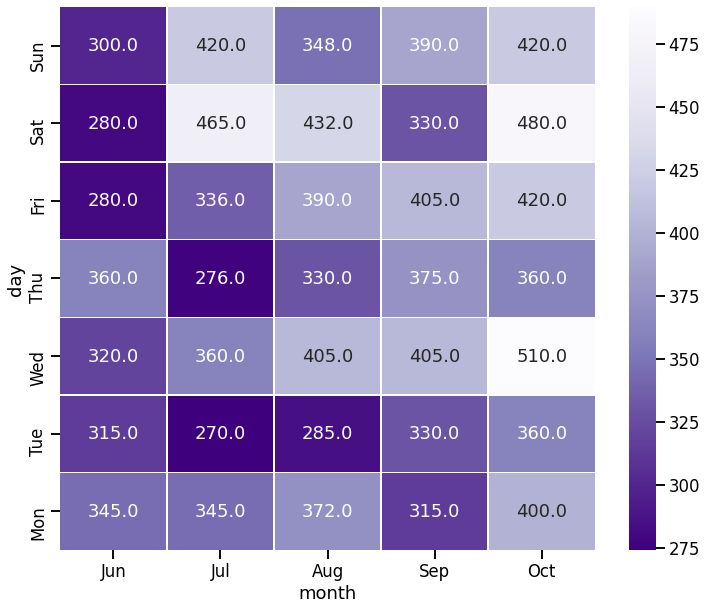

In [468]:
import seaborn as sns
df = pd.pivot_table(data=sleep_df, index='day',values='sleep_duration', columns='month')
df=df.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"][::-1])
df = df[["Jun","Jul","Aug","Sep","Oct"]]
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df, annot=True, fmt="0.1f", linewidths=.5, cmap='Purples_r',ax=ax,robust=True)
